In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#logistic regression
from sklearn.linear_model import LogisticRegression

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Gaussian
from sklearn.naive_bayes import GaussianNB

#Random Forest
from sklearn.ensemble import RandomForestClassifier

### Team Position Classification of Fifa Player v 1.0
#### Using FIFA20 Datasets
by [Rakha Dzaky](https://github.com/rakhadzaky)

In [3]:
#Read Datasets
df = pd.read_csv("fifa20.csv")
pd.set_option('display.max_columns',None)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
#Size of Datasets
df_p = df.copy()
df.shape

(18278, 104)

In [5]:
#Assumption : using team_position as class
df.team_position.unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

### Pre-Processing
#### Cleaning Data
- Check for the Null Value
- Deleting Feature that have no relation with Class
- Check for the categorical value

In [6]:
for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  1298
player_tags  =  16779
team_position  =  240
team_jersey_number  =  240
loaned_from  =  17230
joined  =  1288
contract_valid_until  =  240
nation_position  =  17152
nation_jersey_number  =  17152
pace  =  2036
shooting  =  2036
passing  =  2036
dribbling  =  2036
defending  =  2036
physic  =  2036
gk_diving  =  16242
gk_handling  =  16242
gk_kicking  =  16242
gk_reflexes  =  16242
gk_speed  =  16242
gk_positioning  =  16242
player_traits  =  10712
ls  =  2036
st  =  2036
rs  =  2036
lw  =  2036
lf  =  2036
cf  =  2036
rf  =  2036
rw  =  2036
lam  =  2036
cam  =  2036
ram  =  2036
lm  =  2036
lcm  =  2036
cm  =  2036
rcm  =  2036
rm  =  2036
lwb  =  2036
ldm  =  2036
cdm  =  2036
rdm  =  2036
rwb  =  2036
lb  =  2036
lcb  =  2036
cb  =  2036
rcb  =  2036
rb  =  2036


In [7]:
#Deleting record that have Null value in the team_position column
null_col = [
    'team_position',
]
df_p = df_p.dropna(subset=null_col)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  1058
player_tags  =  16562
loaned_from  =  16990
joined  =  1048
nation_position  =  17152
nation_jersey_number  =  17152
pace  =  1996
shooting  =  1996
passing  =  1996
dribbling  =  1996
defending  =  1996
physic  =  1996
gk_diving  =  16042
gk_handling  =  16042
gk_kicking  =  16042
gk_reflexes  =  16042
gk_speed  =  16042
gk_positioning  =  16042
player_traits  =  10588
ls  =  1996
st  =  1996
rs  =  1996
lw  =  1996
lf  =  1996
cf  =  1996
rf  =  1996
rw  =  1996
lam  =  1996
cam  =  1996
ram  =  1996
lm  =  1996
lcm  =  1996
cm  =  1996
rcm  =  1996
rm  =  1996
lwb  =  1996
ldm  =  1996
cdm  =  1996
rdm  =  1996
rwb  =  1996
lb  =  1996
lcb  =  1996
cb  =  1996
rcb  =  1996
rb  =  1996


In [8]:
#Replace Null Value for all integer type column to zero
coloumns = [
    'dribbling',
    'pace',
    'shooting',
    'passing',
    'defending',
    'physic',
    'gk_diving',
    'gk_handling',
    'gk_kicking',
    'gk_reflexes',
    'gk_speed',
    'gk_positioning',
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb',
]

for col in coloumns:
    df_p.loc[df_p[col].isnull(), col] = 0
    
for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  1058
player_tags  =  16562
loaned_from  =  16990
joined  =  1048
nation_position  =  17152
nation_jersey_number  =  17152
player_traits  =  10588


In [9]:
# delete feature that have no relation with team_position

coloumns = [
    'dob',
    'sofifa_id',
    'player_url',
    'long_name',
    'nationality',
    'club',
    'player_positions',
    'body_type',
    'real_face',
    'team_jersey_number',
    'contract_valid_until',
    'release_clause_eur',
    'player_tags',
    'loaned_from',
    'joined',
    'nation_position',
    'nation_jersey_number',
    'player_traits',
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb',
]

for col in coloumns:
    df_p = df_p.drop(col, axis=1)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

In [10]:
df_p

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,Left,5,4,4,Medium/Low,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,Right,5,4,5,High/Low,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,Right,5,5,5,High/Medium,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,Right,3,3,1,Medium/Medium,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,Right,4,4,4,High/Medium,LW,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,48,56,40000,2000,Right,1,3,2,Medium/High,RES,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,2000,Right,1,2,2,Medium/Medium,SUB,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,1000,Right,1,2,2,Low/Medium,SUB,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,1000,Right,1,2,2,Low/Low,SUB,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


In [11]:
b_fit = df_p.team_position.unique()

In [12]:
#Replace categorical value with number that can be computed
le = LabelEncoder()
df_p['preferred_foot'] = le.fit_transform(df_p['preferred_foot'])
df_p['work_rate'] = le.fit_transform(df_p['work_rate'])
df_p['team_position'] = le.fit_transform(df_p['team_position'])

In [13]:
a_fit = df_p.team_position.unique()

In [14]:
klasifikasi_arr = [b_fit, a_fit]
print(klasifikasi_arr)

[array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', 'RWB', 'LWB'],
      dtype=object), array([25, 14,  0,  5, 19,  8, 27,  2, 10, 23, 18,  9, 12,  3, 28,  7, 13,
       17, 20, 21, 16, 24, 22,  4,  1, 11,  6, 26, 15], dtype=int64)]


#### Cleaned Datasets

In [15]:
df_p

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,0,5,4,4,7,25,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,1,5,4,5,1,14,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,1,5,5,5,2,0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,1,3,3,1,8,5,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,1,4,4,4,2,14,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,48,56,40000,2000,1,1,3,2,6,21,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,2000,1,1,2,2,8,28,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,1000,1,1,2,2,5,28,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,1000,1,1,2,2,4,28,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


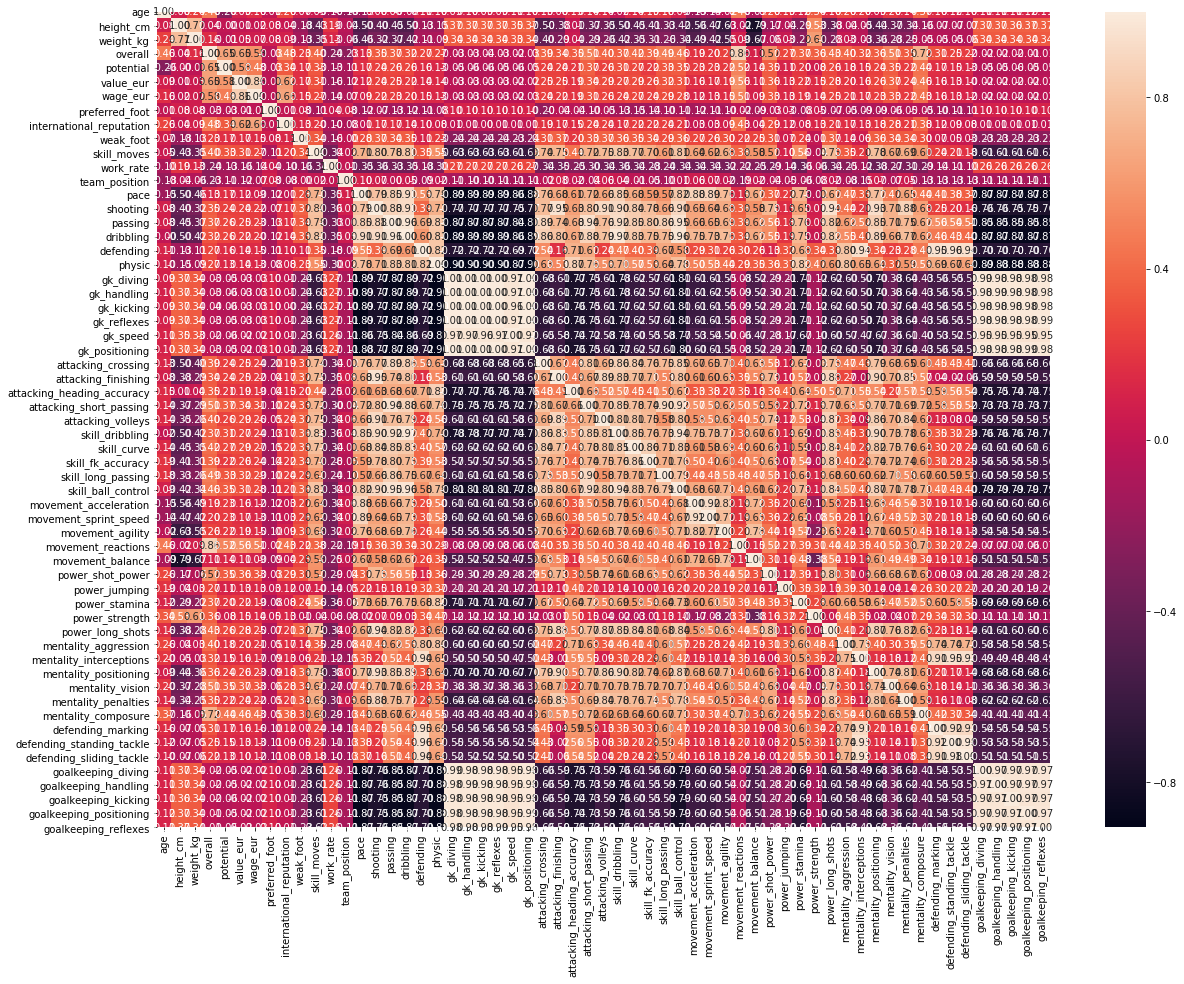

In [16]:
#Checking for correlation between column
plt.figure(figsize=(20,15))
sns.heatmap(df_p.corr(), annot=True, fmt='.2f');

### Modeling
- Split Dataset
- Make model using sklearn
- Print the accuracy

In [17]:
#Split data into 25% test and 75% train
X_le = df_p.drop('team_position', axis=1)
X_le = X_le.drop('short_name', axis=1)
y = df_p['team_position']
X_train, X_test, y_train, y_test = train_test_split(X_le, y, test_size=0.25, random_state=0)

In [18]:
class Report:
    def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
    
    def metrics(self, model):
        y_pred = model.predict(self.X)
        
        print('Accuracy score:\n')
        print(accuracy_score(self.y, y_pred))
        
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(self.y, y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.y, y_pred))
    

In [19]:
report = Report(X_test, y_test)

In [20]:
#Decision Tree Model with max_depth = 5
dt = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
report.metrics(dt)

Accuracy score:

0.4556541019955654

Confusion Matrix:

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    1
    89]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    21]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    45]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    1
     1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
    17]
 [   0    0    0    0    0  137    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
    42]
 [   0    0    0    0    0    0 

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
#Random Forest Model
rf = RandomForestClassifier().fit(X_train, y_train)
report.metrics(rf)

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score:

0.4090909090909091

Confusion Matrix:

[[   7    0    0    0    0    0    0    1    0    5    3    0    3    0
     2    0    0    0    1    4    2    6    0    2    0    1    0    1
    53]
 [   0    0    0    0    0    0    0    0    3    0    0    0    0    0
     0    0    0    0    7    0    0    0    0    0    0    0    0    0
    11]
 [   0    0    3    0    0    0    0    0    0    0    2    0    0    0
     0    0    0    0    2    2    2    1    0    0    0    0    0    0
    33]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     2]
 [   0    0    1    0    0    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    1    1    2    0    0    0    0    0    0
    12]
 [   0    0    0    0    0  103    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    3    0    0    0    0    0    0
    74]
 [   0    0    0    0    0    0 

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
#KNN Model
knn = KNeighborsClassifier().fit(X_train, y_train)
report.metrics(knn)

Accuracy score:

0.32483370288248337

Confusion Matrix:

[[   4    1    2    1    0    8    0    5    1    4    0    0    5    1
     0    0    0    4    0    3    1    8    0    4    1    0    0    1
    37]
 [   0    0    0    0    0    2    0    0    3    0    0    0    0    0
     0    0    0    1    2    0    0    3    0    0    0    0    0    0
    10]
 [   2    0    0    0    2    1    0    3    1    2    0    0    1    0
     1    0    0    2    0    0    0    6    0    0    0    0    0    1
    23]
 [   0    0    0    0    0    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     1]
 [   1    0    1    0    0    0    0    2    1    1    0    0    1    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
    10]
 [   4    2    1    0    2   38    0    0    8    1    0    0    3    2
     2    0    0    1    8    0    0   18    0    0    1    2    0    3
    84]
 [   1    0    0    0    0    0

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
#Logistic Regression Model
log = LogisticRegression().fit(X_train, y_train)
report.metrics(log)

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy score:

0.44124168514412415

Confusion Matrix:

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    1    0    0
    90]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1    0    0    0    0    0    0    0    0    0
    20]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    45]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    18]
 [   0    0    0    0    0   40    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
   140]
 [   0    0    0    0    0    0

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
#Print Decision Tree Model that has higher accuracy
y_pred = dt.predict(X_test)
hasil = [y_pred, y_test]
df_hasil = pd.DataFrame(hasil, index=['Predicted','Actual']) 
df_hasil

0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  \
Predicted  28  28  28  28  28  28  28  28  28  28  28  28  28   5  28  28  28   
Actual     28  28   9  28  28  21  10   8  20   8  21  28  28  21  28  18   7   

           17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
Predicted  28  28  28  28  28  21  28  28  21  28  28  28  28  28  28  21  28   
Actual     28  21   9  19   0  19  24   1  28  28  28   9  28  12  21  28  21   

           34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  \
Predicted  28  28  28  28  28  28  28  28  28  28  28  28  28   5  28  28  28   
Actual     21  21  18  28  20  28  19  10   8  28  28  28  21   5  28  12  28   

           51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
Predicted  28  28  28  21  28  28  28  28   5  28   5   5  28  28  28  27  28   
Actual     28  27  21  28  28   7  28  28   5  28  21   5  28  10   5  27  28   

           68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  \
Predicted  28   5  28  28  28  28  28  28  28  28   5  28   5  28  28  28  28   
Actual     28  21  28  23  28  21  20  28  10  27   5  28  28  27  24  28  28   

           85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  \
Predicted  28  28  28  28  28  28  28   5   5  28  28  28  28  28  28   28   
Actual     28   8  28  28  28  28  28  28   5  28  23  28  21   1   8   28   

           101  102  103  104  105  106  107  108  109  110  111  112  113  \
Predicted   28   28   28   28   28    5   28   28   28   21   28   27   28   
Actual      27   28   18   28    8   28   23   28   12   28   28   13    7   

           114  115  116  117  118  119  120  121  122  123  124  125  126  \
Predicted   28   28   28   28   28   28    5   28   28   28   28   28   28   
Actual      28   21   25   17   19   23   28   21   21    2   28    7   27   

           127  128  129  130  131  132  133  134  135  136  137  138  139  \
Predicted   28   28   28   28   28   28   28   28   28   28    5   28   28   
Actual      28   28   10   28   28   28    8   17   28   28   28   28   28   

           140  141  142  143  144  145  146  147  148  149  150  151  152  \
Predicted   28   28   28   21   28   28   28   21   28   28   28   28   28   
Actual      28    8   17   21    8   18    5   21   28   28   28   28   28   

           153  154  155  156  157  158  159  160  161  162  163  164  165  \
Predicted   28   28   28   28   28   27   28   28   28   28   28   28   28   
Actual       8   28   28   28   18   27    9   18   28    7   10   12    9   

           166  167  168  169  170  171  172  173  174  175  176  177  178  \
Predicted   28   28   28   28   28   28   28   28   28    5   28   28   28   
Actual      25   27    7   21   28   21   28   28   13   28   19   21   28   

           179  180  181  182  183  184  185  186  187  188  189  190  191  \
Predicted   28   28   28   28   28   28    5   28   28    5   28   21   28   
Actual      21   13   28    8   28   28   28   18   21    5   21   21   21   

           192  193  194  195  196  197  198  199  200  201  202  203  204  \
Predicted   28   21   21   28   28   28   28   28   21   28   28   28   28   
Actual      28   28   28   28   21   21   28   28   21   21    2   28   12   

           205  206  207  208  209  210  211  212  213  214  215  216  217  \
Predicted   28   28   28   28   28   28   28   28   28   28   28   28   28   
Actual       9   28   19    8   17   28   12   28   20   28   19   28   28   

           218  219  220  221  222  223  224  225  226  227  228  229  230  \
Predicted   28   28   28   28   28    5   28   28   28   28   28   28    5   
Actual      28   28   28   28   19    5   18    7   28   28   17   17   28   

           231  232  233  234  235  236  237  238  239  240  241  242  243  \
Predicted   21   28   28   28   28   28   28   28   28   28   28   28   28   
Actual      21   19   21   21   21   28   18   21  